# DSA5101 - Introduction to Big Data for Industry


**Prepared by *Dr Li Xiaoli*** 

# Data set represent 10 digits, sth like

**Hand-written digits**

http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png 

In [1]:
# Import a few important libraries
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

In [2]:
# Take a look at our data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

<Figure size 432x288 with 0 Axes>

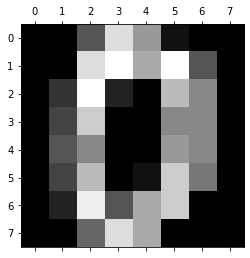

In [12]:
plt.gray()
plt.matshow(digits.images[0])

In [15]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
len(X[0])

64

<Figure size 432x288 with 0 Axes>

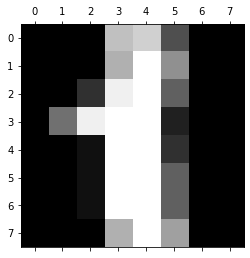

In [13]:
plt.gray()
plt.matshow(digits.images[1])

In [16]:
X.shape
# 1797 examples (64 dimension) belonging to 10 classes

(1797, 64)

In [20]:
# Some image processing to reshape each image into a 8*8 matrix
def nudge_images(X, y):
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

In [8]:
# Define a function to perform visualization based on data and labels 
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    # min-max normalization
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	54.96s
average :	52.84s
complete :	59.10s
single :	51.95s


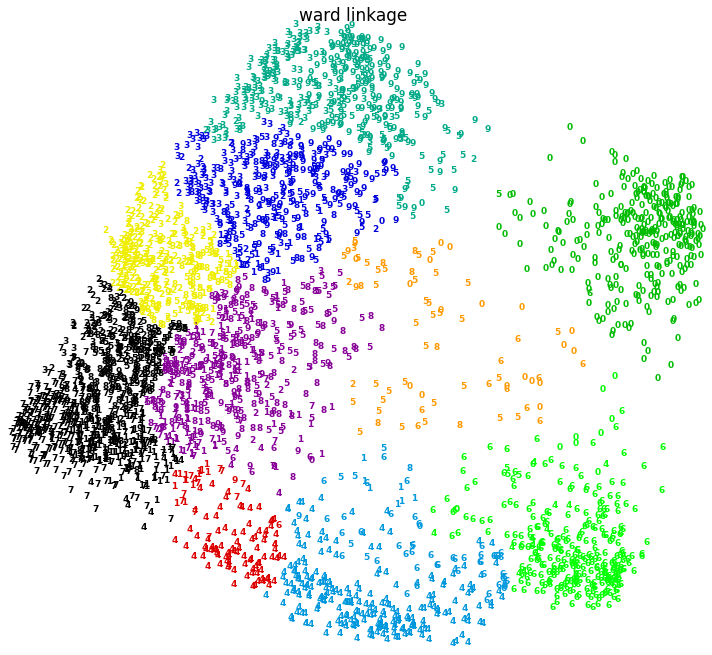

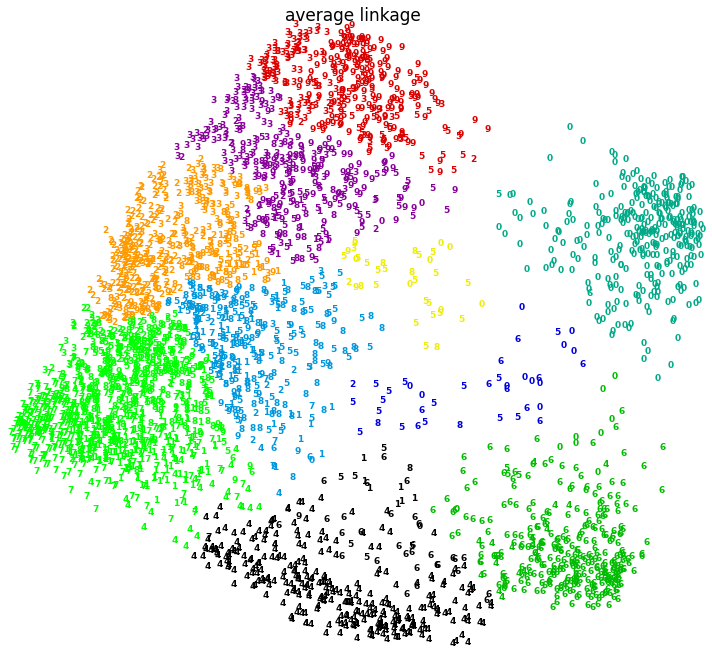

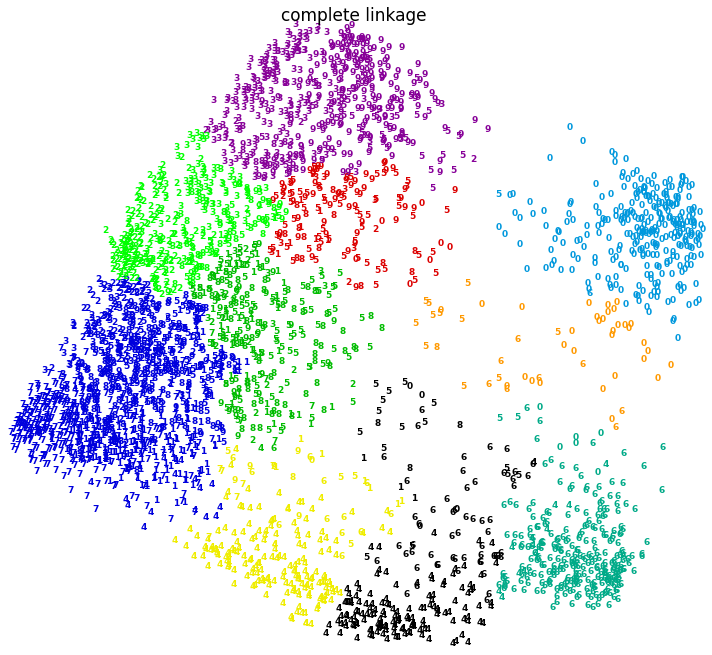

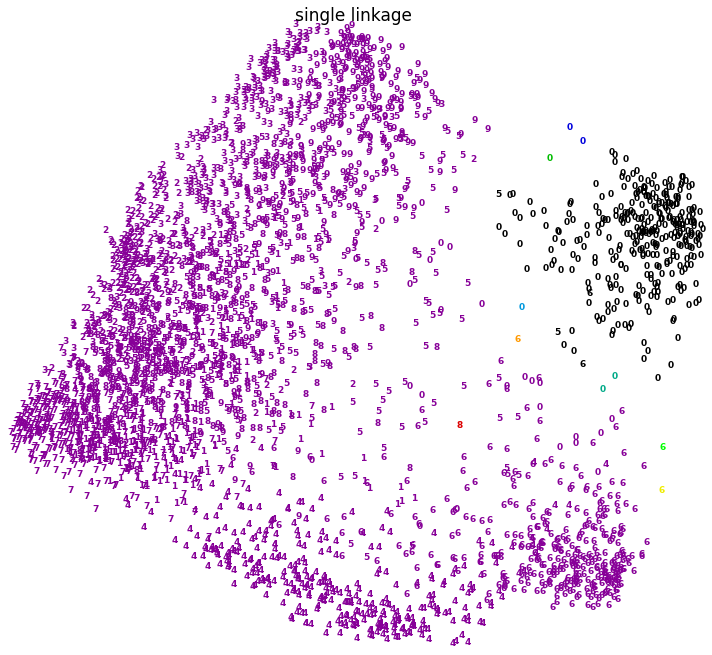

In [9]:
#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)  # Spectral embedding for non-linear dimensionality reduction.
# We will visulizate clustering results using each example's 2-d representation (Instead of original representation,
# we can also easily vidualize the results if we cluster 2D data)
print("Done.")

# Import AgglomerativeClustering package for hierachical clustering
from sklearn.cluster import AgglomerativeClustering  

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()  # time before clustering
    clustering.fit(X_red)  # perform the HC
    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage) # Visulize clustering results in 2D
    print("%s :\t%.2fs" % (linkage, time() - t0)) # time spent on clustering and visualization [time difference]


# We can see the clustering results are not very good - Some examples in the same cluster (with same colour) are mixed with different characters. 

### Single linkage performs the worst 